In [35]:
%load_ext autoreload
%autoreload 2

import numpy as np
import subprocess
import mdtraj as mdt
import shutil
from pathlib import Path

import sys
sys.path.append("../analysis/")
# from chem_shift import run_faspr
from add_sidechains import add_sidechains
from rg import gmx_gyrate
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
ens_path = "../MeV_NT_ens"
cmd = rf'find {ens_path}/ensemble_200_* -regex "^.*/[0-9]+a_132\.pdb$"'
res = subprocess.run(cmd, shell=True, capture_output=True, text=True)


In [36]:
pdbs = [Path(pdb) for pdb in res.stdout.splitlines()]

pdbs_all = add_sidechains(pdbs)

In [40]:
type(pdbs_all[0])

mdtraj.core.trajectory.Trajectory

In [41]:
isinstance(pdbs_all[0], mdt.Trajectory)

True

In [38]:
mdt.join([pdbs_all[34],pdbs_all[102]])

ValueError: The topologies of the Trajectories are not the same

In [10]:

sys.path.append("../")
from cmap import build_phipsi

phipsis = [build_phipsi(pdb) for pdb in pdbs_all]

phipsis = np.concatenate(phipsis, axis=1)

np.save("ensemble_phipsi.npy", phipsis)

In [11]:
!ls

11577a_132.pdb	     pales	   ref_traj_analysis.ipynb  rotacf.py.bak
chem_shift	     plot_gmx_res  relax_tests.ipynb	    sort_by_rg.ipynb
cmap		     posre.itp	   relax_tests_old.ipynb    topol.top
ensemble.pdb	     prova.pdb	   rg.ipynb
ensemble_phipsi.npy  prova.xtc	   rg_test.ipynb
ensemble.xtc	     __pycache__   rotacf.ipynb


In [3]:
import tempfile

faspr_bin = "/home/gzappavigna/software/FASPR/FASPR"
scwrl_bin = "/home/gzappavigna/software/scwrl/Scwrl4"

pdbs = [Path(pdb) for pdb in res.stdout.splitlines()]

frames = []

# with tempfile.TemporaryDirectory(delete=False) as tempdir_:
#     tempdir = Path(tempdir_)

#     for pdb_cg in pdbs:
#         shutil.copy(pdb_cg, tempdir)
#         pdb_cg = tempdir / pdb_cg.name
#         assert pdb_cg.exists()

#         pdb_all = tempdir / (pdb_cg.stem + "_all.pdb")
#         # subprocess.run([faspr_bin, "-i", str(pdb_cg), "-o", str(pdb_all)], stdout=subprocess.DEVNULL, check=True)
#         subprocess.run([scwrl_bin, "-i", str(pdb_cg), "-o", str(pdb_all)],  stdout=subprocess.DEVNULL, check=True)
#         assert pdb_all.exists()

#         # pdb_all_h  = tempdir / (pdb_all.stem + "_h.gro")
#         # subprocess.run(["gmx", "pdb2gmx", "-f", str(pdb_all), "-o", str(pdb_all_h), "-ff", "amber99sb", "-water", "none"], cwd=tempdir, check=True)
#         # assert pdb_all_h.exists()

#         frames.append(mdt.load(pdb_all, standard_names=False))

#         # (tempdir / "topol.top").unlink()
#         # (tempdir / "posre.itp").unlink()



In [42]:
rg = np.array([mdt.compute_rg(frame)[0] for frame in frames])

In [43]:
rg

array([2.52780937, 4.51953552, 3.63368308, 3.32035025, 3.1051284 ,
       4.4770932 , 2.97015313, 3.51722841, 4.23817954, 2.14954403,
       2.67174366, 2.58483094, 4.4469487 , 2.70387085, 3.41836798,
       3.08173469, 3.50958514, 2.63492022, 2.83956153, 2.61321216,
       3.45629304, 2.85566335, 2.57205024, 4.31224157, 2.67273731,
       2.61321873, 3.63320466, 3.1656605 , 3.93920978, 2.71227206,
       2.31132709, 4.11209412, 3.83332559, 2.61526811, 4.2694942 ,
       2.53295361, 2.37734207, 3.26800626, 3.30691792, 4.48950662,
       4.1794739 , 2.72519705, 3.33949608, 2.77867731, 3.9578857 ,
       2.89063379, 4.62649342, 2.83857073, 3.57539375, 3.83013923,
       4.3379787 , 2.37896288, 3.65954022, 2.56118005, 2.78182509,
       2.60219372, 5.15668353, 3.75656566, 4.09781029, 3.2543755 ,
       2.43439965, 1.83370732, 2.62978443, 3.43673895, 4.14741112,
       3.75634851, 2.75752053, 3.23516423, 3.43491347, 3.73915098,
       3.66300643, 3.24467745, 3.12646469, 2.82734488, 3.43288

In [40]:
# [frame.n_atoms for frame in frames]
mdt.join(frames)

ValueError: Number of atoms in self (1288) is not equal to number of atoms in other

In [54]:
len(frames)

1000

In [55]:
frames[100].topology

<mdtraj.Topology with 1 chains, 132 residues, 1287 atoms, 1214 bonds at 0x7f693d9156d0>

In [35]:
top = frames[1].topology

In [34]:
frames[0].topology == frames[1].topology

False

In [44]:
from itertools import combinations

repeats = []

mask = np.ones(len(ens_traj), dtype=bool)

for (i1, frame1), (i2, frame2) in combinations(enumerate(ens_traj), 2):
    if np.all(frame1.xyz == frame2.xyz):
        mask[i2] = False
        # repeats.append((i1, i2))


In [53]:
frames[0].n_atoms

1288

In [41]:
len({frozenset(inds) for inds in repeats})

163

In [26]:
ens_traj[0].save("ensemble.pdb")
ens_traj.save("ensemble.xtc")

In [27]:
rg = gmx_gyrate("ensemble.xtc", "ensemble.pdb")
rg = rg.reset_index()

27


In [17]:
rg = mdt.compute_rg(ens_traj)

In [28]:
rg

,t,Rg,Rg_x,Rg_y,Rg_z
0,0,2.98719,2.49291,1.84612,2.86772
1,0,3.84526,3.02170,2.67366,3.64595
2,0,4.15934,3.91872,3.95742,1.89279
3,0,3.97740,3.22619,2.59827,3.80528
4,0,3.01110,2.60378,2.55024,2.20229
...,...,...,...,...,...
995,0,2.29378,1.97610,1.51714,2.07754
996,0,3.62298,2.16112,3.25118,3.31834
997,0,2.34955,2.09276,1.54940,2.06411
998,0,4.47597,4.11111,4.12442,2.48125


In [45]:
idx = np.argsort(np.abs(rg - rg.mean()))[0]

In [46]:
idx

184

In [33]:
rg.mean()

3.276452145308161

In [20]:
# rg = rg.sort_values("Rg_delta")

In [48]:
# closest_to_mean = ens_traj[idx]
closest_to_mean = frames[idx]

In [49]:
np.abs(mdt.compute_rg(closest_to_mean) - rg.mean())

array([0.00038227])

(array([ 46., 202., 244., 221., 138.,  76.,  53.,  15.,   3.,   2.]),
 array([1.83370732, 2.27544446, 2.71718159, 3.15891872, 3.60065586,
        4.04239299, 4.48413013, 4.92586726, 5.3676044 , 5.80934153,
        6.25107866]),
 <BarContainer object of 10 artists>)

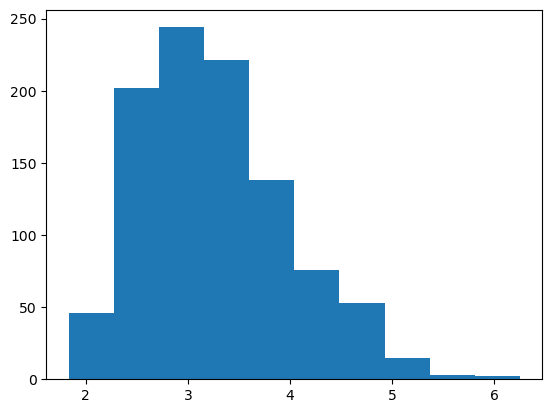

In [50]:
plt.hist(rg)

In [61]:
pdbs[idx].stem

'11577a_132'

In [62]:
closest_to_mean.save(f"{pdbs[idx].stem}.pdb")

In [64]:
!realpath 11577a_132.pdb

/home/gzappavigna/lmp_conf_builder/notebooks/11577a_132.pdb


In [63]:
!ls -lrt

total 13080
-rwxr-xr-x 1 gzappavigna gzappavigna 1767788 Oct  3 09:32 rotacf.ipynb
drwxr-xr-x 2 gzappavigna gzappavigna    4096 Oct  3 09:32 pales
drwxr-xr-x 4 gzappavigna gzappavigna    4096 Oct  3 09:32 chem_shift
-rw-r--r-- 1 gzappavigna gzappavigna 4117900 Oct  3 09:32 ensemble.xtc
drwxr-xr-x 2 gzappavigna gzappavigna    4096 Oct  3 09:32 __pycache__
-rwxr-xr-x 1 gzappavigna gzappavigna     983 Oct  3 09:32 rotacf.py.bak
-rwxr-xr-x 1 gzappavigna gzappavigna 1120527 Oct  3 09:32 ref_traj_analysis.ipynb
-rwxr-xr-x 1 gzappavigna gzappavigna   83240 Oct  3 09:32 prova.pdb
-rwxr-xr-x 1 gzappavigna gzappavigna  879262 Oct  3 09:32 relax_tests_old.ipynb
-rwxr-xr-x 1 gzappavigna gzappavigna 4117900 Oct  3 09:32 prova.xtc
-rwxr-xr-x 1 gzappavigna gzappavigna   30618 Oct  3 09:32 rg.ipynb
-rwxr-xr-x 1 gzappavigna gzappavigna  362011 Oct  3 09:32 relax_tests.ipynb
-rw-r--r-- 1 gzappavigna gzappavigna   83240 Oct  3 09:33 ensemble.pdb
drwxr-xr-x 2 gzappavigna gzappavigna    4096 Oct  3 09:33 p

In [57]:
!pwd

/home/gzappavigna/lmp_conf_builder/notebooks


In [56]:
!ls

chem_shift		pales	      __pycache__	       rg_test.ipynb
closest_to_rg_mean.pdb	plot_gmx_res  ref_traj_analysis.ipynb  rotacf.ipynb
cmap			posre.itp     relax_tests.ipynb        rotacf.py.bak
ensemble.pdb		prova.pdb     relax_tests_old.ipynb    sort_by_rg.ipynb
ensemble.xtc		prova.xtc     rg.ipynb		       topol.top


In [75]:
sasa = mdt.shrake_rupley(ens_traj)
total_sasa = sasa.sum(axis=1)

(array([  8.,  13.,  33.,  58., 112., 161., 221., 222., 132.,  40.]),
 array([122.69772339, 126.40473175, 130.11174011, 133.81874084,
        137.52575684, 141.23275757, 144.9397583 , 148.64677429,
        152.35377502, 156.06079102, 159.76779175]),
 <BarContainer object of 10 artists>)

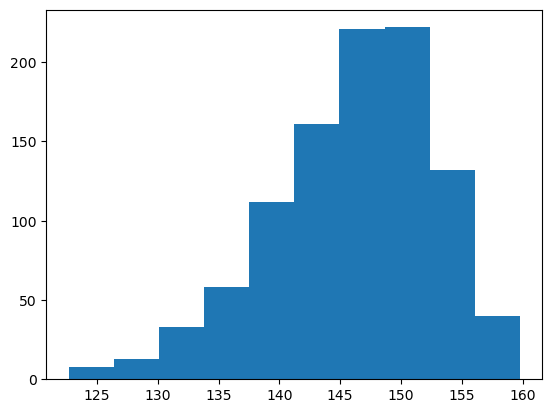

In [76]:
plt.hist(total_sasa)

In [78]:
total_sasa[175]

147.9391

In [79]:
total_sasa.mean()

146.03801